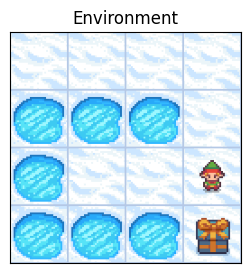

In [14]:
import sys
import matplotlib.pyplot as plt
sys.path.append("..")
from mango.environments import frozen_lake

params = dict(map_name="RANDOM", p=None, shape=(4, 4), seed=0)
env = frozen_lake.CustomFrozenLakeEnv(**params)
env = frozen_lake.wrappers.ReInitOnReset(env, **params)
env = frozen_lake.wrappers.TensorObservation(env, one_hot=True)

obs, info = env.reset()
plt.figure(figsize=(3, 3))
plt.title(f"Environment")
plt.imshow(env.unwrapped.render())
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
from mango.mango import MangoEnv, Agent
from mango.policies.dqnet import DQNetTrainer, DQNetPolicy
from mango.neuralnetworks.networks import ConvEncoder


def make(env: MangoEnv, trainer_kwargs, net_kwargs) -> tuple[DQNetPolicy, DQNetTrainer]:
    net = ConvEncoder(in_channels=None, out_features=int(env.action_space.n), **net_kwargs).eval()
    return DQNetPolicy(net, env.action_space), DQNetTrainer(net, **trainer_kwargs)


net_kwargs = dict(hidden_channels=[32], hidden_features=[])
trainer_kwargs = dict(lr=1e-3, gamma=0.99, tau=1e-3)


policy, trainer = make(MangoEnv(env), trainer_kwargs, net_kwargs)
agent = Agent(MangoEnv(env), policy)
trans = agent.run_episode(1.0)

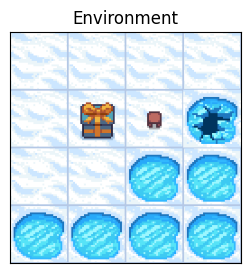

0.0 True False

3 0.0 False False
1 0.0 False False
2 0.0 True False


In [32]:
plt.figure(figsize=(3, 3))
plt.title(f"Environment")
plt.imshow(env.unwrapped.render())
plt.xticks([])
plt.yticks([])
plt.show()

print(trans.reward, trans.terminated, trans.truncated)
print()
for step in trans.steps:
    print(step.action, step.reward, step.terminated, step.truncated)